In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [10]:
# load the MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

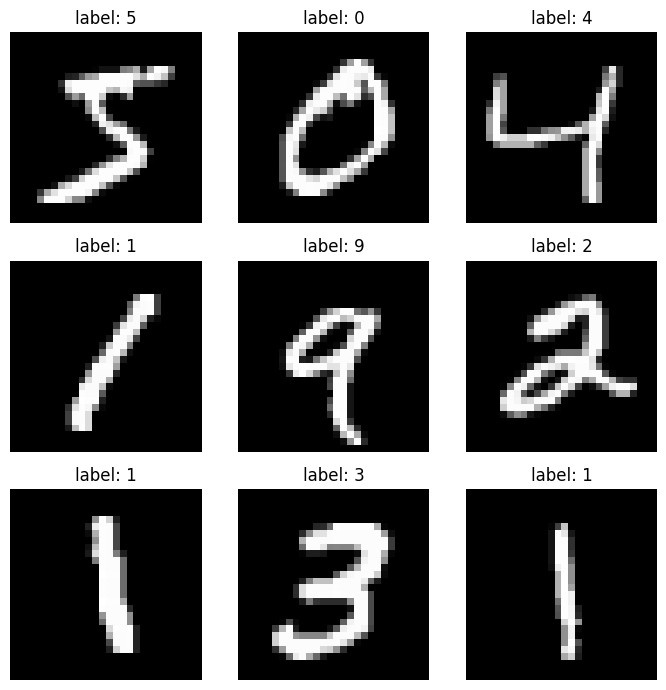

In [11]:
# view some example images from the training dataset

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
# pre-process data: normalize pixel values to the [0, 1] range

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
# if necessary, reshape data as required by the model input shape

In [14]:
# one-hot encode labels

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [16]:
# build the sequential model

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # flatten the 28x28 images into 784-dimensional vectors
model.add(Dense(128, activation='relu')) # add a fully-connected layer with 128 neurons and ReLU activation function
model.add(Dense(10, activation='softmax')) # output layer with 10 neurons (one per class) and softmax activation function

In [17]:
# compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# print a summary of the model

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# train the model

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8708 - loss: 0.4588 - val_accuracy: 0.9633 - val_loss: 0.1299
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9622 - loss: 0.1297 - val_accuracy: 0.9727 - val_loss: 0.0950
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0843 - val_accuracy: 0.9732 - val_loss: 0.0848
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.0602 - val_accuracy: 0.9773 - val_loss: 0.0772
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9867 - loss: 0.0453 - val_accuracy: 0.9775 - val_loss: 0.0736


In [22]:
# evaluate performance on the test dataset

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAccuracy on test dataset: {100*test_acc:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0880

Accuracy on test dataset: 97.62%


In [23]:
# predict on the test dataset

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
# function to plot an image and its prediction

def plot_image_prediction(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(predictions_array):.2f}%)\nTrue: {true_label}", color=color)

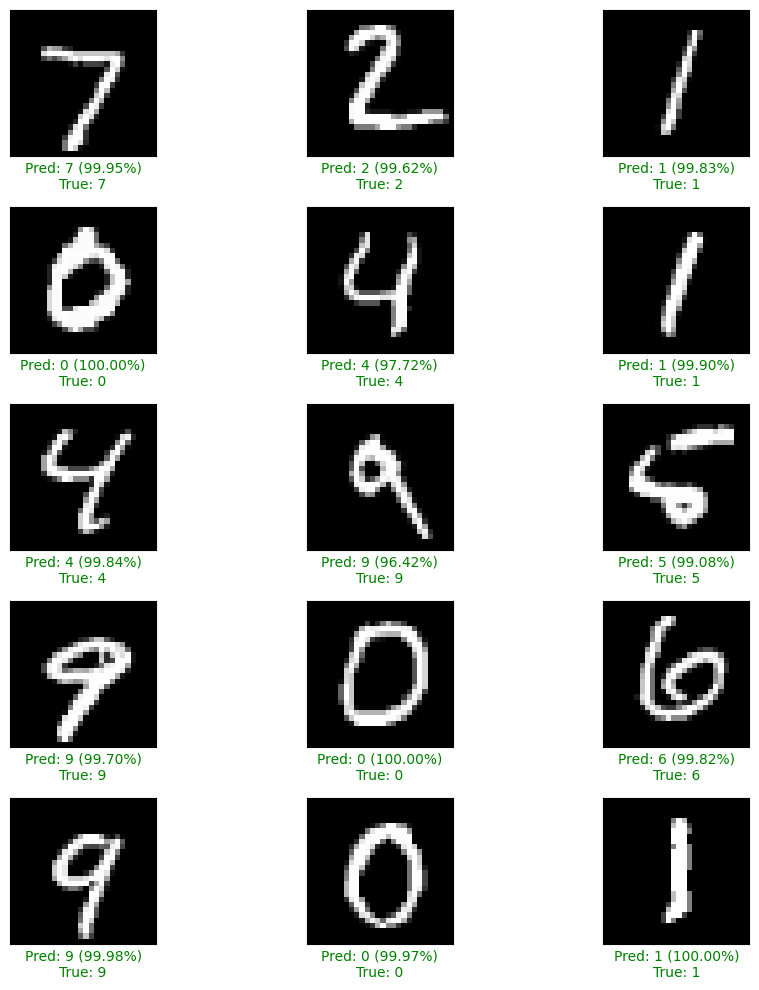

In [28]:
# view some images and their predictions

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image_prediction(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()